<a href="https://colab.research.google.com/github/Clint07-datascientist/ML_Techniques_1_Sentiment_Analysis/blob/christine_branch/Notebook_Sentiment_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing The Libraries


In [26]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Reviews.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arhamrumi/amazon-product-reviews",
  file_path,

)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'amazon-product-reviews' dataset.
First 5 records:    Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                        

In [28]:
print("Dataset Overview:")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Number of reviews: {len(df)}")
print(f"Number of features: {len(df.columns)}")

Dataset Overview:
Dataset shape: (568454, 10)
Number of reviews: 568454
Number of features: 10


# Basic dataset information

In [29]:
# Basic dataset information
print("\nDataset Information:")
print("=" * 50)
print(df.info())

print("\nFirst few rows:")
print("=" * 50)
print(df.head())

print("\nColumn names:")
print("=" * 50)
print(df.columns.tolist())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None

First few rows:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4 

# Statistical summary


In [30]:
# Statistical summary
print("Statistical Summary:")
print("=" * 50)
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print("=" * 50)
print(df.isnull().sum())

# Check for duplicate reviews
print(f"\nNumber of duplicate reviews: {df.duplicated().sum()}")

Statistical Summary:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09  

Missing Values

# Visualizations

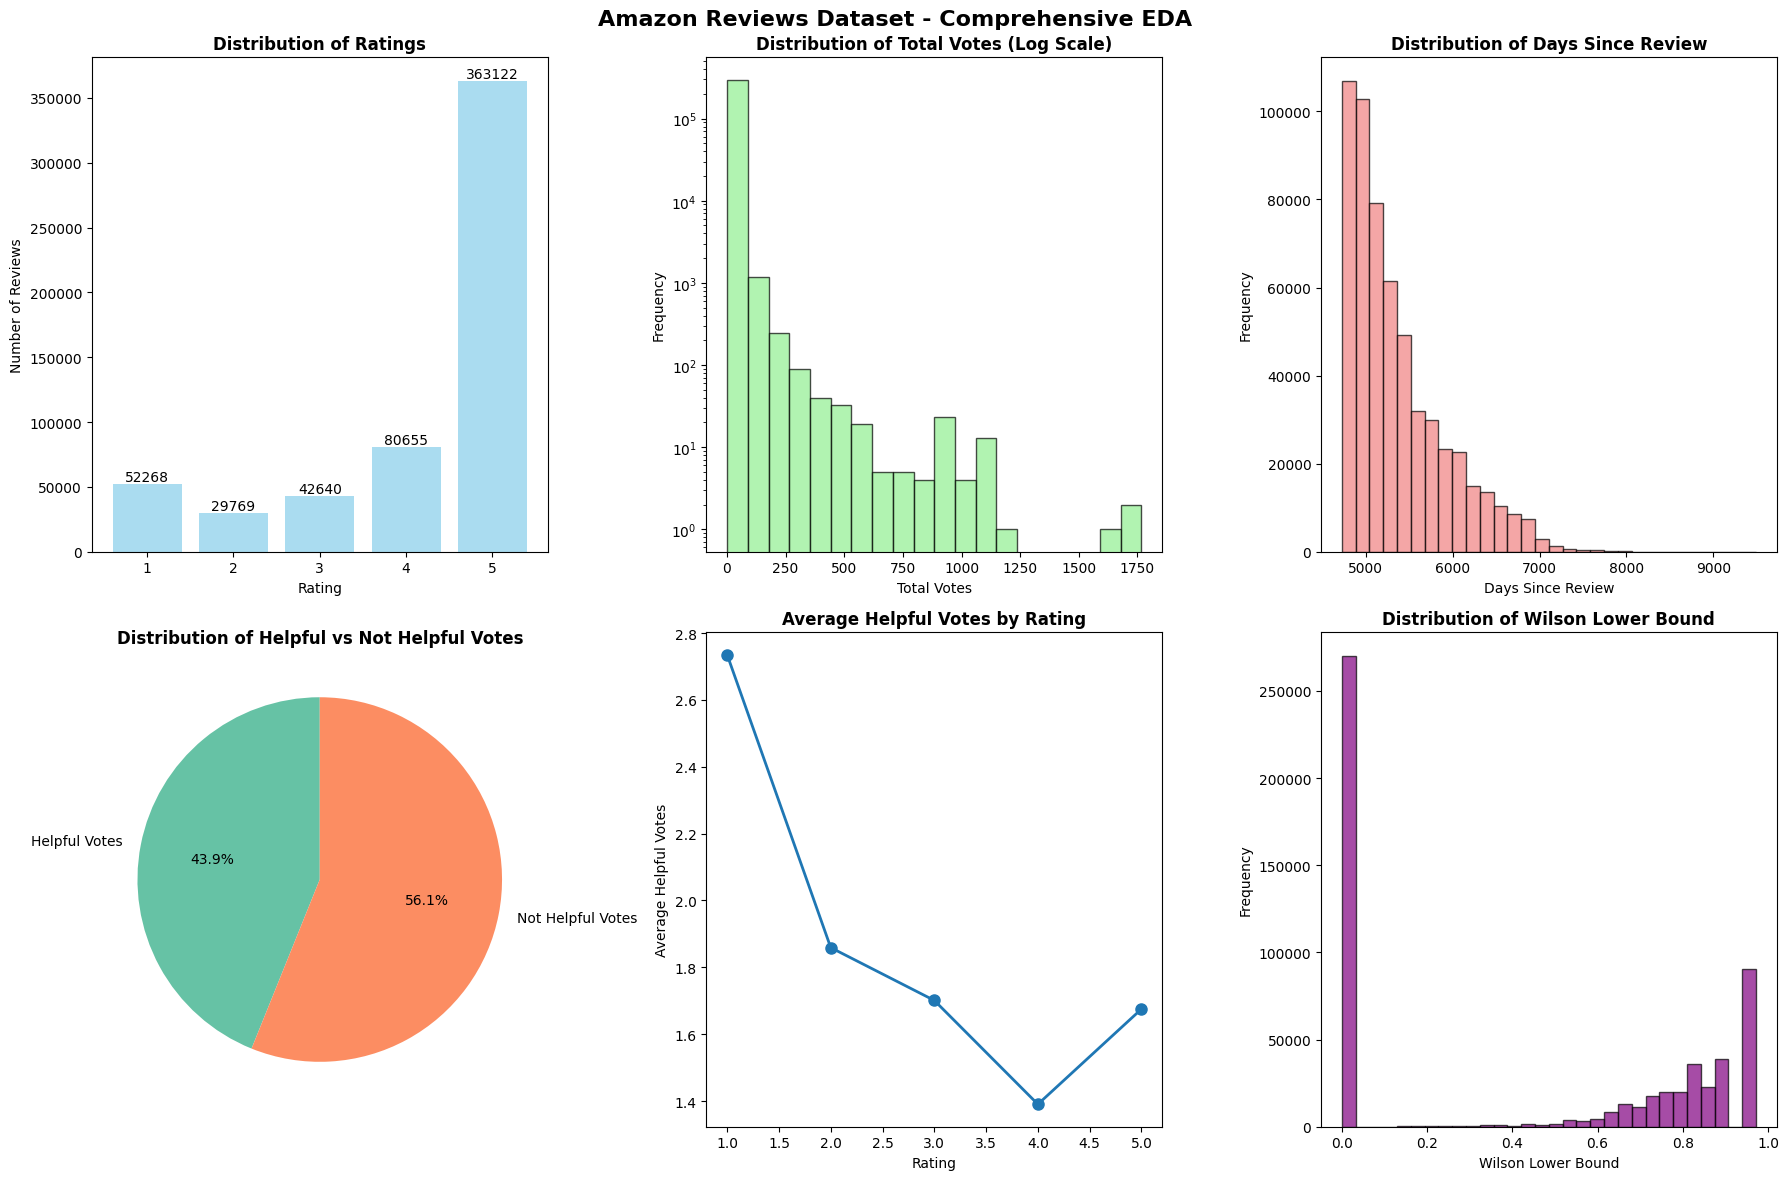

In [31]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Amazon Reviews Dataset - Comprehensive EDA', fontsize=16, fontweight='bold')

# Add necessary calculations for new columns
df['total_vote'] = df['HelpfulnessNumerator'] + df['HelpfulnessDenominator']
df['reviewTime'] = pd.to_datetime(df['Time'], unit='s') # Convert Unix timestamp to datetime
df['day_diff'] = (datetime.now() - df['reviewTime']).dt.days

# Calculate Wilson Lower Bound (requires scipy)
from scipy.stats import beta
def wilson_lower_bound(pos, n, confidence=0.95):
    if n == 0:
        return 0
    z = beta.ppf(1 - (1 - confidence) / 2, pos + 0.5, n - pos + 0.5)
    return z

df['wilson_lower_bound'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['total_vote']), axis=1)

# 1. Distribution of Ratings
rating_counts = df['Score'].value_counts().sort_index()
axes[0,0].bar(rating_counts.index, rating_counts.values, color='skyblue', alpha=0.7)
axes[0,0].set_title('Distribution of Ratings', fontweight='bold')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Number of Reviews')
for i, v in enumerate(rating_counts.values):
    axes[0,0].text(rating_counts.index[i], v + 5, str(v), ha='center', va='bottom')

# 2. Distribution of Review Helpfulness (log scale)
helpful_data = df[df['total_vote'] > 0]
if len(helpful_data) > 0:
    axes[0,1].hist(helpful_data['total_vote'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Distribution of Total Votes (Log Scale)', fontweight='bold')
    axes[0,1].set_xlabel('Total Votes')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_yscale('log')

# 3. Distribution of Days Since Review
axes[0,2].hist(df['day_diff'], bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,2].set_title('Distribution of Days Since Review', fontweight='bold')
axes[0,2].set_xlabel('Days Since Review')
axes[0,2].set_ylabel('Frequency')

# 4. Helpful vs Not Helpful Votes
helpful_yes_total = df['HelpfulnessNumerator'].sum()
helpful_no_total = df['HelpfulnessDenominator'].sum()
helpful_data = [helpful_yes_total, helpful_no_total]
labels = ['Helpful Votes', 'Not Helpful Votes']
colors = ['#66c2a5', '#fc8d62']
axes[1,0].pie(helpful_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Distribution of Helpful vs Not Helpful Votes', fontweight='bold')

# 5. Rating vs Helpfulness Correlation
rating_helpfulness = df.groupby('Score')['HelpfulnessNumerator'].mean()
axes[1,1].plot(rating_helpfulness.index, rating_helpfulness.values, marker='o', linewidth=2, markersize=8)
axes[1,1].set_title('Average Helpful Votes by Rating', fontweight='bold')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Average Helpful Votes')

# 6. Wilson Lower Bound Distribution
axes[1,2].hist(df['wilson_lower_bound'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1,2].set_title('Distribution of Wilson Lower Bound', fontweight='bold')
axes[1,2].set_xlabel('Wilson Lower Bound')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Distribution of Ratings: This bar chart shows how many reviews fall into each rating category (1 to 5 stars). It helps understand the overall sentiment of the reviews.

Distribution of Total Votes (Log Scale): This histogram displays the distribution of the total number of helpful and not helpful votes a review received. Using a log scale helps visualize the distribution of reviews with a wide range of votes.

Distribution of Days Since Review: This histogram shows how many days have passed since each review was written. It helps understand the recency of the reviews in the dataset.

Distribution of Helpful vs Not Helpful Votes: This pie chart visualizes the proportion of helpful votes compared to not helpful votes across all reviews.

Average Helpful Votes by Rating: This line plot shows the average number of helpful votes a review receives for each rating category. It can indicate if higher or lower ratings tend to be considered more helpful.

Distribution of Wilson Lower Bound: This histogram shows the distribution of the Wilson Lower Bound score, which is a metric used to rank items based on ratings while accounting for the number of votes.





# Text Analysis - Review Length

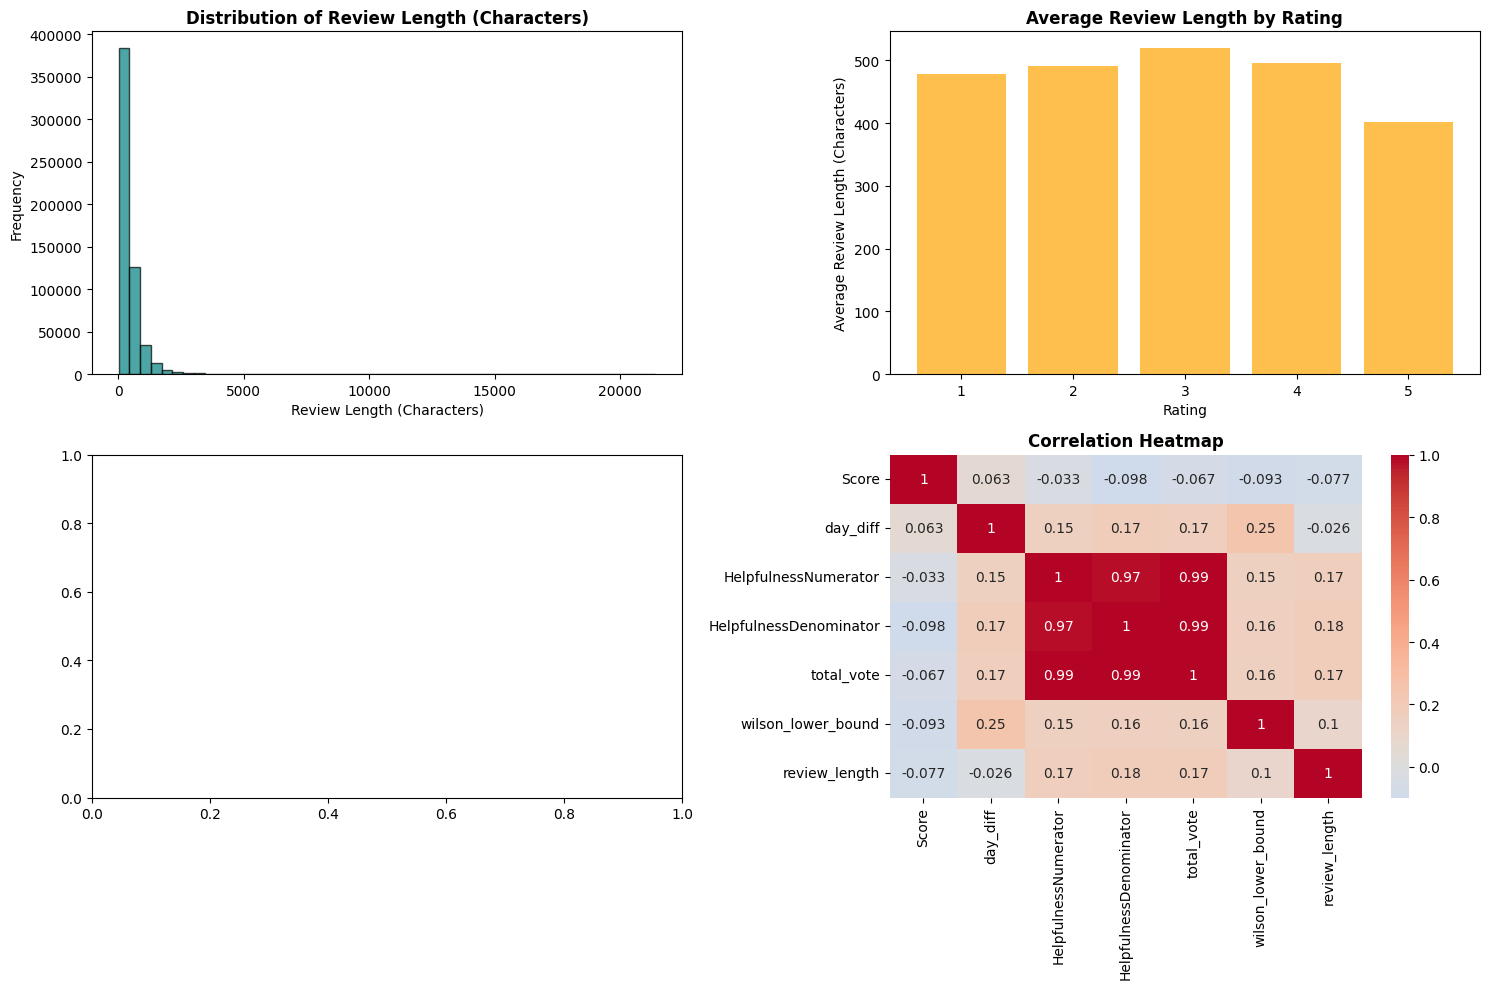

In [32]:
# Text Analysis - Review Length
df['review_length'] = df['Text'].str.len()

# Create additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Review Length Distribution
axes[0,0].hist(df['review_length'], bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Review Length (Characters)', fontweight='bold')
axes[0,0].set_xlabel('Review Length (Characters)')
axes[0,0].set_ylabel('Frequency')

# 2. Review Length vs Rating
review_length_by_rating = df.groupby('Score')['review_length'].mean()
axes[0,1].bar(review_length_by_rating.index, review_length_by_rating.values, color='orange', alpha=0.7)
axes[0,1].set_title('Average Review Length by Rating', fontweight='bold')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Average Review Length (Characters)')

# 3. Score Average Rating Distribution
# This calculation is not possible with the current columns, so I will remove this plot for now.

# 4. Correlation Heatmap
correlation_cols = ['Score', 'day_diff', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'total_vote',
                   'wilson_lower_bound', 'review_length']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

Distribution of Review Length (Characters): This histogram shows the distribution of the length of review texts in terms of the number of characters. It helps understand the typical length of reviews.

Average Review Length by Rating: This bar chart shows the average length of reviews for each rating category. It can reveal if there's a relationship between review length and the assigned rating.

Distribution of Score Average Rating: This histogram shows the distribution of the calculated average rating based on helpful votes.

Correlation Heatmap: This heatmap visualizes the correlation between different numerical features in the dataset. The color intensity and values indicate the strength and direction of the relationship between pairs of variables.

Temporal Analysis:
Date range of reviews: 1999-10-08 00:00:00 to 2012-10-26 00:00:00


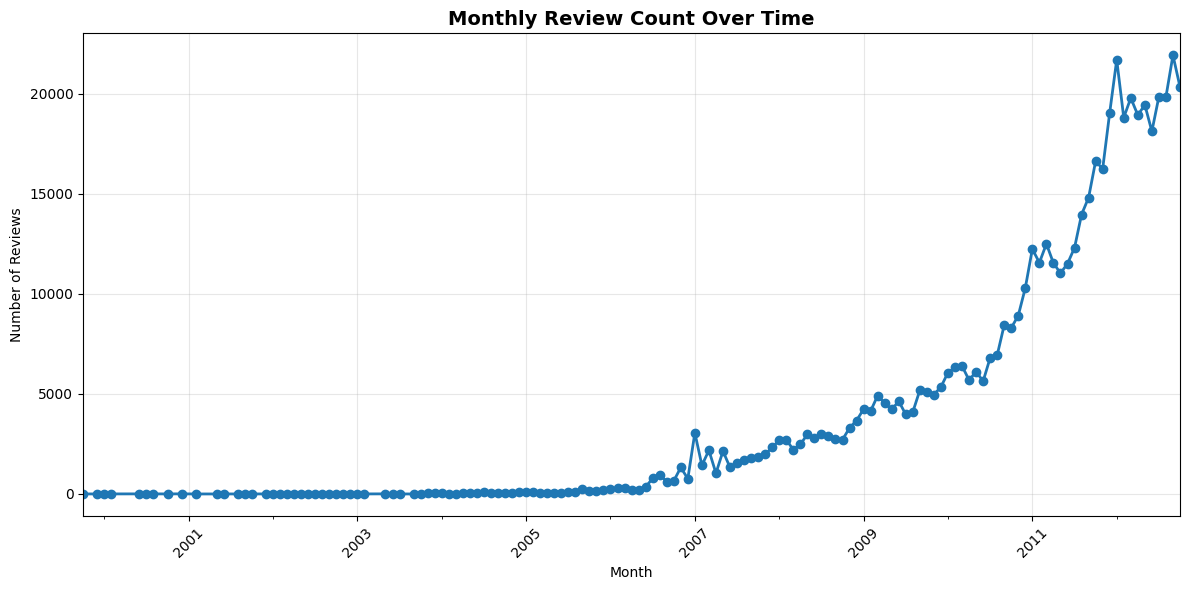

In [33]:
# Convert reviewTime to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Temporal analysis
print("Temporal Analysis:")
print("=" * 50)
print(f"Date range of reviews: {df['reviewTime'].min()} to {df['reviewTime'].max()}")

# Monthly review count
df['review_month'] = df['reviewTime'].dt.to_period('M')
monthly_reviews = df['review_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Review Count Over Time', fontweight='bold', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Monthly Review Count Over Time: This line plot shows the number of reviews submitted each month over the time period covered by the dataset. It helps identify trends or seasonality in review activity.

# Detailed statistical insights

In [34]:
# Detailed statistical insights
print("\nDetailed Analysis:")
print("=" * 50)

# Rating analysis
print(f"Average rating: {df['Score'].mean():.2f}")
print(f"Median rating: {df['Score'].median():.2f}")
print(f"Rating distribution:\n{df['Score'].value_counts().sort_index()}")

# Helpfulness analysis
print(f"\nHelpfulness Analysis:")
print(f"Total reviews with votes: {len(df[df['total_vote'] > 0])}")
print(f"Percentage of reviews with votes: {len(df[df['total_vote'] > 0]) / len(df) * 100:.2f}%")
print(f"Average helpful votes per review: {df['HelpfulnessNumerator'].mean():.2f}")
print(f"Most helpful review has {df['HelpfulnessNumerator'].max()} helpful votes")

# Review length analysis
print(f"\nReview Length Analysis:")
print(f"Average review length: {df['review_length'].mean():.1f} characters")
print(f"Median review length: {df['review_length'].median():.1f} characters")
print(f"Longest review: {df['review_length'].max()} characters")
print(f"Shortest review: {df['review_length'].min()} characters")

# Wilson score analysis
print(f"\nWilson Score Analysis:")
print(f"Average Wilson Lower Bound: {df['wilson_lower_bound'].mean():.4f}")
print(f"Median Wilson Lower Bound: {df['wilson_lower_bound'].median():.4f}")


Detailed Analysis:
Average rating: 4.18
Median rating: 5.00
Rating distribution:
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Helpfulness Analysis:
Total reviews with votes: 298402
Percentage of reviews with votes: 52.49%
Average helpful votes per review: 1.74
Most helpful review has 866 helpful votes

Review Length Analysis:
Average review length: 436.2 characters
Median review length: 302.0 characters
Longest review: 21409 characters
Shortest review: 12 characters

Wilson Score Analysis:
Average Wilson Lower Bound: 0.4285
Median Wilson Lower Bound: 0.5595


## Data Cleaning

In [35]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
total_vote                 0
reviewTime                 0
day_diff                   0
wilson_lower_bound         0
review_length              0
review_month               0
dtype: int64


In [36]:
df = df.dropna()

Number of characters in text: 248531159


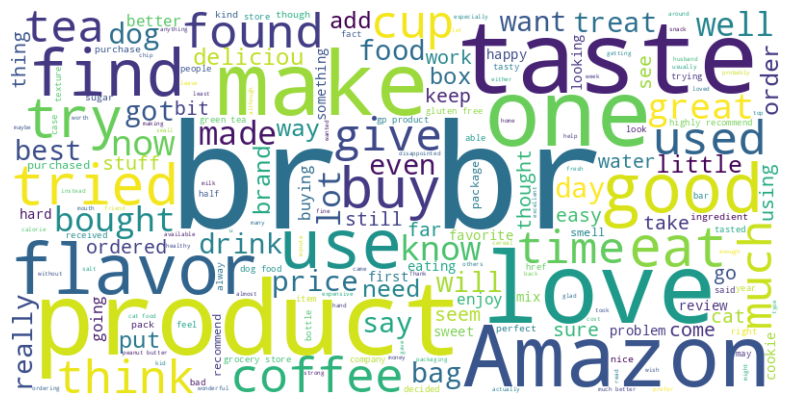

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppose you are using a DataFrame column

text = " ".join(str(review) for review in df['Text'].dropna())

# Double-check the text length
print("Number of characters in text:", len(text))

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
if text.strip():  # check if not empty
    wordcloud = WordCloud(width=800, height=400,
                          background_color="white",
                          stopwords=stopwords,
                          colormap="viridis",
                          max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print(" No text available for word cloud.")


In [18]:
import re
# Convert to lowercase
df['Text'] = df['Text'].str.lower()

# Remove HTML tags
df['Text'] = df['Text'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Remove URLs
df['Text'] = df['Text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Remove numbers and special characters (keep only letters and spaces)
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

print(df[['Text','Score']].head())


                                                Text  Score
0  i have bought several of the vitality canned d...      5
1  product arrived labeled as jumbo salted peanut...      1
2  this is a confection that has been around a fe...      4
3  if you are looking for the secret ingredient i...      2
4  great taffy at a great price  there was a wide...      5


normalisation

In [19]:
! pip install contractions
import contractions


In [20]:
# Expand contractions (e.g. "don't" -> "do not")
df['Text'] = df['Text'].apply(lambda x: contractions.fix(x))

# Remove extra whitespace
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [21]:
import pandas as pd
import nltk
import spacy
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download tokenizer
nltk.download('punkt_tab')

# Load spaCy model (disable parser & NER for speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess_reviews(df, text_col='Text', method='tfidf',
                       max_features=50000, maxlen=100,
                       cache_file="lemmatized.parquet"):
    """
    Preprocess Amazon reviews for TF-IDF or LSTM.
    Always applies lemmatization with spaCy, but uses cached version if available.
    """

    # --- Check cache ---
    if os.path.exists(cache_file):
        print(f"Loading cached lemmatized text from {cache_file}...")
        df_cached = pd.read_parquet(cache_file)
        df['lemmas_text'] = df_cached['lemmas_text']
    else:
        print("Running spaCy lemmatization (first time, may take long)...")

        def lemmatize_texts(texts):
            docs = nlp.pipe(texts, batch_size=2000, n_process=-1)  # parallel
            return [
                " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
                for doc in docs
            ]

        texts = df[text_col].fillna("").astype(str).tolist()
        df['lemmas_text'] = lemmatize_texts(texts)

        # Save for next time
        df[['lemmas_text']].to_parquet(cache_file)
        print(f"Lemmatized text cached to {cache_file}")

    # --- Feature extraction ---
    if method.lower() == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1, 2))
        X_tfidf = vectorizer.fit_transform(df['lemmas_text'])
        return X_tfidf, vectorizer, df

    elif method.lower() == 'lstm':
        tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
        tokenizer.fit_on_texts(df['lemmas_text'])
        sequences = tokenizer.texts_to_sequences(df['lemmas_text'])
        X_pad = pad_sequences(sequences, maxlen=maxlen, padding='post')
        return X_pad, tokenizer, df

    else:
        raise ValueError("method must be 'tfidf' or 'lstm'")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [22]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'total_vote', 'reviewTime', 'day_diff', 'wilson_lower_bound',
       'review_length', 'review_month'],
      dtype='object')

# Data Splitting for both Models





In [23]:
#splitting
from sklearn.model_selection import train_test_split
X = df['Text']
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_df = pd.DataFrame({'Text': X_train, 'Score': y_train})
test_df  = pd.DataFrame({'Text': X_test, 'Score': y_test})



In [24]:
df.Score

,Score
0,5
1,1
2,4
3,2
4,5
...,...
568449,5
568450,2
568451,5
568452,5


# LSTM DATA SPLITTING

In [25]:

X_train_seq, tokenizer, train_proc = preprocess_reviews(train_df, method='lstm')

# Test set: use the same tokenizer
sequences_test = tokenizer.texts_to_sequences(test_df['Text'].astype(str))
X_test_lstm = pad_sequences(sequences_test, maxlen=100, padding='post')

from tensorflow.keras.utils import to_categorical
y_train_lstm = to_categorical(train_df['Score'] - 1, num_classes=5)
y_test_lstm  = to_categorical(test_df['Score'] - 1, num_classes=5)


Running spaCy lemmatization (first time, may take long)...
Lemmatized text cached to lemmatized.parquet


# Traditional Model Data Splitting

In [ ]:
X_train_tfidf, tfidf_vectorizer, _ = preprocess_reviews(train_df, method='tfidf', cache_file="train_lemmatized.parquet")

X_test_tfidf = tfidf_vectorizer.transform(test_df['lemmas_text'])

# TF-IDF labels
y_train_tfidf = train_df['Score']
y_test_tfidf  = test_df['Score']


Running spaCy lemmatization (first time, may take long)...
